# EXPLORATORY DATA ANALYSIS
### Hans Schumann and Augie Doebling
### 2.May 2018

Looking at bitcoin prices using twitter meta-data

In [3]:
"""
This file will take data from the SQL database and perform exploratory analysis for model building
"""

## import all packages / other files needed
import pymysql
import numpy as np
import pandas as pd
import helpers
import matplotlib.pyplot as plt
%matplotlib inline

### Connecting to the database and creating a dataframe for the tweet and price data

In [4]:
## create credentials
DB_USERNAME = ""
DB_PASSWORD = ""
with open("creds.txt", "r") as creds:
    DB_USERNAME = creds.readline()[:-1]
    DB_PASSWORD = creds.readline()[:-1]

connection = pymysql.connect(host='seniorproject.cxbqypcd9gwp.us-east-2.rds.amazonaws.com',
                             user=DB_USERNAME,
                             password=DB_PASSWORD,
                             db='seniorproject')
## get all the rows from the sql database
cursor = connection.cursor()
sentimentQuery = "SELECT * FROM sentiment"
cursor.execute(sentimentQuery)
sentimentRows = cursor.fetchall()
## put all the rows in a dataframe
sentiment = pd.DataFrame(list(sentimentRows),
                         columns = ['key','id','datetime','currency','price','logprice',
                                    'times','count','favorites','retweets','avg_sentiment'])

## add day of the week variable
sentiment['datetime'] = pd.to_datetime(sentiment['datetime'])
sentiment['day_of_week'] = sentiment['datetime'].dt.weekday_name
sentiment = pd.concat([sentiment,pd.get_dummies(sentiment['day_of_week'])],axis = 1)

## convert necessary columns to numeric
sentiment['price'] = pd.to_numeric(sentiment['price'])
sentiment['logprice'] = pd.to_numeric(sentiment['logprice'])
sentiment['times'] = pd.to_numeric(sentiment['times'])
sentiment['count'] = pd.to_numeric(sentiment['count'])
sentiment['favorites'] = pd.to_numeric(sentiment['favorites'])
sentiment['retweets'] = pd.to_numeric(sentiment['retweets'])
sentiment['avg_sentiment'] = pd.to_numeric(sentiment['avg_sentiment'])

### Here, we will do some data cleaning

In [14]:
## calculate price change for one minute
# sentiment.head()['price_change'] = sentiment.head()['price'] - sentiment.head()['price'].shift(-1)
sentiment['price_change_1'] = sentiment['price'].shift(-1) - sentiment['price']

## calculate price change for 5 minutes
sentiment['price_change_5'] = sentiment['price'].shift(-5) - sentiment['price']

## calculate price change for 30 minutes
sentiment['price_change_30'] = sentiment['price'].shift(-30) - sentiment['price']

## calculate price change for one hour
sentiment['price_change_60'] = sentiment['price'].shift(-60) - sentiment['price']

sentiment = sentiment.fillna(0)

In [5]:
sentiment.head()

,key,id,datetime,currency,price,logprice,times,count,favorites,retweets,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,price_change_1,price_change_5,price_change_30,price_change_60
0,0,1038612,2017-01-01 00:00:00,bitcoin,973.363509,6.880758,1038593,19,9,11,...,0,0,1,0,0,0,0.000000,0.007885,-2.476834,-2.002977
1,1,1038613,2017-01-01 00:01:00,bitcoin,973.363509,6.880758,1038594,3,1,0,...,0,0,1,0,0,0,0.000000,0.020667,-2.476834,-1.761025
2,2,1038614,2017-01-01 00:02:00,bitcoin,973.363509,6.880758,1038595,5,1,0,...,0,0,1,0,0,0,-0.003509,0.018513,-2.463509,-1.761025
3,3,1038615,2017-01-01 00:03:00,bitcoin,973.360000,6.880754,1038596,3,3,4,...,0,0,1,0,0,0,0.027871,-0.868096,-2.460000,-2.517700
4,4,1038616,2017-01-01 00:04:00,bitcoin,973.387871,6.880783,1038597,3,0,0,...,0,0,1,0,0,0,-0.016476,-1.937806,-2.493183,-2.811840


### First, let's plot the price of bitcoin over our domain of time

C:\Users\Hans\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


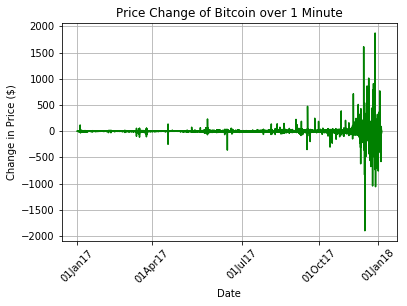

In [6]:
ticks = np.array(['01Jan17','01Apr17','01Jul17','01Oct17','01Jan18'])

plt.plot(sentiment['price_change_1'],color = 'green')
plt.title('Price Change of Bitcoin over 1 Minute')
plt.xlabel('Date')
plt.ylabel('Change in Price ($)')
plt.xticks(np.array([0,101930,223963,327689,408301]),ticks,rotation = 45)
ax = plt.axes()
ax.grid(True)

C:\Users\Hans\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


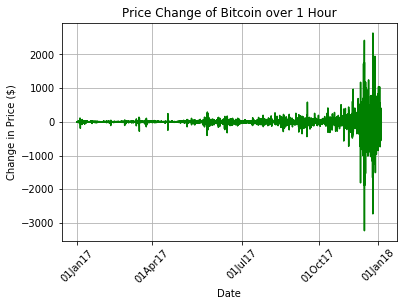

In [7]:
ticks = np.array(['01Jan17','01Apr17','01Jul17','01Oct17','01Jan18'])

plt.plot(sentiment['price_change_60'],color = 'green')
plt.title('Price Change of Bitcoin over 1 Hour')
plt.xlabel('Date')
plt.ylabel('Change in Price ($)')
plt.xticks(np.array([0,101930,223963,327689,408301]),ticks,rotation = 45)
ax = plt.axes()
ax.grid(True)

We see that the amount of variation in the price changes is very high as the time approaches the present day.  This is very interesting and is exactly what we want to tap into moving forward.

C:\Users\Hans\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


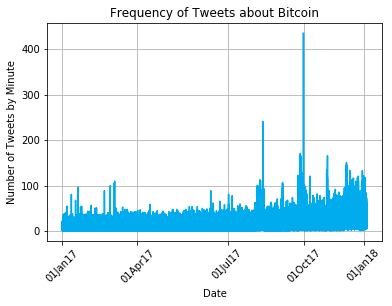

In [8]:
ticks = np.array(['01Jan17','01Apr17','01Jul17','01Oct17','01Jan18'])

plt.plot(sentiment['count'],color = '#00aced')
plt.title('Frequency of Tweets about Bitcoin')
plt.xlabel('Date')
plt.ylabel('Number of Tweets by Minute')
plt.xticks(np.array([0,101930,223963,327689,408301]),ticks,rotation = 45)
ax = plt.axes()
ax.grid(True)

In [11]:
np.mean(sentiment['count']),np.std(sentiment['count']),np.max(sentiment['count']) - np.min(sentiment['count'])

(12.021845260315413, 10.282108226699261, 435)

In [12]:
np.mean(sentiment['price']),np.std(sentiment['price']),np.max(sentiment['price']) - np.min(sentiment['price'])

(3562.5831255270923, 3664.075978856437, 19148.7111525)

In [16]:
np.mean(sentiment['favorites']),np.std(sentiment['favorites']),np.max(sentiment['favorites']) - np.min(sentiment['favorites'])

(18.627653694932345, 135.5714278715581, 64053)

In [17]:
np.mean(sentiment['retweets']),np.std(sentiment['retweets']),np.max(sentiment['retweets']) - np.min(sentiment['retweets'])

(18.465494087817365, 356.47920062521285, 202337)

In [18]:
np.mean(sentiment['avg_sentiment']),np.std(sentiment['avg_sentiment']),np.max(sentiment['avg_sentiment']) - np.min(sentiment['avg_sentiment'])

(0.07530556096590413, 0.10010166138783608, 2.0)

In [15]:
np.mean(sentiment['price_change_1']),np.std(sentiment['price_change_1']),np.max(sentiment['price_change_1']) - np.min(sentiment['price_change_1'])

(0.03684716560542301, 12.795694866176753, 3773.1306679999998)

In the plot above, we can see that there are generally not an overwhelming number of tweets.  Most of the time, the values are below 100 tweets per minute. A couple spikes are seen at various times, with the most extreme reaching over 400 tweets about bitcoin in a minute. 

Second though, the trend seems to be generally upward.  This is suggestive from a quick glance that the number of tweets could be predictive of the change in prices.  As more tweets appeared, we begin to see more variability in the change in price from minute to minute.

### NOTES:
There are a couple issues in the data.  Due to pulling issues from the twitter database, we have gaps in the data.  Sometimes, twitter did not allow us to grab specific days.  This therefore leads us to have a lag that is not for one minute prior, but instead a gap in time.  I am not completely sure how to deal with this issue.  It is common, but we also have most of the data in perfect succession by minute.

In [9]:
## price change by day of the week
dow_mean = sentiment.groupby('day_of_week').agg('mean')['price_change_1']
dow_mean

day_of_week
Friday       0.045695
Monday       0.114656
Saturday     0.001735
Sunday       0.020017
Thursday     0.071329
Tuesday      0.013826
Wednesday   -0.006644
Name: price_change_1, dtype: float64

Here, we can see a possibility that day will be an important factor for our price change analysis.  With this, we can see that Monday had the highest average change in price from minute to minute.  This may be from a delay in weekend trading, or some other factor.  Whatever it is, we will attempt to capitalize on this.

I may use a different program (minitab, etc) to make a nice barplot to show this data.  Could be good in the presentation.

In [10]:
dow_std = sentiment.groupby('day_of_week').agg('std')['price_change_1']
dow_std

day_of_week
Friday       15.340920
Monday       10.501752
Saturday     10.144929
Sunday       11.011301
Thursday     18.152655
Tuesday      10.362197
Wednesday    11.889806
Name: price_change_1, dtype: float64

Looking at the amount of fluctation, we could see the days with the highest standard deviation in the price change minute by minute are Thursday and Friday.  So once again, there could be importance in day of the week, and we will try to discover this in our future analyses.

### Quantitative Analysis

I decided to look at the autocorrelations up to 5 days in advance.  Some results are outputted below

([<matplotlib.axis.XTick at 0x1c7e9708048>,
 <a list of 6 Text xticklabel objects>)

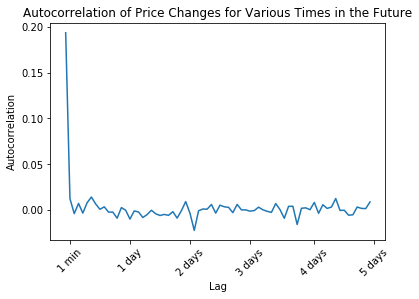

In [111]:
autocorrs = []
for i in range(1,1440*5,100):
    a = sentiment['price_change_1'].autocorr(i)
    autocorrs.append(a)

plt.plot(autocorrs)
plt.title('Autocorrelation of Price Changes for Various Times in the Future')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.xticks([1,15,29,43,58,72],['1 min','1 day','2 days','3 days','4 days','5 days'],
           rotation = 45)

From the plot above, we can see that the autocorrelation tends to be around zero.  For any lags greater than a couple hours.  Also, we never really see an autocorrelation above a magnitude of 0.20.  This could be good for a linear model because we could assume indpendence of the price changes over time, roughly.  The goal though, will be to explain these changes with twitter data as well soon.

In [61]:
sentiment.head()

,key,id,datetime,currency,price,logprice,times,count,favorites,retweets,avg_sentiment,price_change_1,price_change_5,price_change_30,price_change_60,day_of_week
0,0,1038612,2017-01-01 00:00:00,bitcoin,973.363509,6.880758,1038593,19,9,11,0.050175,0.000000,0.007885,-2.476834,-2.002977,Sunday
1,1,1038613,2017-01-01 00:01:00,bitcoin,973.363509,6.880758,1038594,3,1,0,0.045455,0.000000,0.020667,-2.476834,-1.761025,Sunday
2,2,1038614,2017-01-01 00:02:00,bitcoin,973.363509,6.880758,1038595,5,1,0,0.140000,-0.003509,0.018513,-2.463509,-1.761025,Sunday
3,3,1038615,2017-01-01 00:03:00,bitcoin,973.360000,6.880754,1038596,3,3,4,0.045455,0.027871,-0.868096,-2.460000,-2.517700,Sunday
4,4,1038616,2017-01-01 00:04:00,bitcoin,973.387871,6.880783,1038597,3,0,0,-0.116667,-0.016476,-1.937806,-2.493183,-2.811840,Sunday


Below, I will try running a binary logistic regression just using the twitter variables and day of the week.  We will see if the binary logistic regression gives a good estimation of the probability of increasing price after one minute.  Then look deeper into the lags, possibly developing thoughts about the correct trading time after purchasing.

In [101]:
# split data into testing and training
x_vars = ['count','favorites','retweets','avg_sentiment',
          'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

sentiment = sentiment.sample(frac = 1)
n = int(0.75 * len(sentiment))
train = sentiment[:n]
test = sentiment[n:]
x_train = train[x_vars]
x_test = test[x_vars]
y_train = train['price_change_1'] > 0
y_test = test['price_change_1'] > 0


from sklearn import linear_model
lm = linear_model.LogisticRegression()
lm.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
## output the accuracy of the model
lm.score(x_test,y_test)

0.51472342075919908

From this test, we see that the testing accuracy is extremely low.  Although this is our first model, a little discouraging.  We got not much better than 50% accuracy on whether or not the price even increased.  More investigation could be done along with feature engineering, such as more lag variables or a better way to combine the data.

This may just be a bad predictor when we look at the minute directly superceding a certain point in time.  What is we looked ahead at the same intervals as above and tested the accuracy?  The following code and plot of accuracy is displayed below.

In [112]:
accuracies = []
for i in range(1,1440*5,100):
    dummy_df = sentiment
    dummy_df['price_change_future'] = dummy_df['price'].shift(-1) - dummy_df['price']
    x_vars = ['count','favorites','retweets','avg_sentiment',
          'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

    dummy_df = dummy_df.sample(frac = 1)
    n = int(0.75 * len(dummy_df))
    train = dummy_df[:n]
    test = dummy_df[n:]
    x_train = train[x_vars]
    x_test = test[x_vars]
    y_train = train['price_change_future'] > 0
    y_test = test['price_change_future'] > 0
    lm.fit(x_train,y_train)
    accuracies.append(lm.score(x_test,y_test))

([<matplotlib.axis.XTick at 0x1c7eb0ddda0>,
 <a list of 6 Text xticklabel objects>)

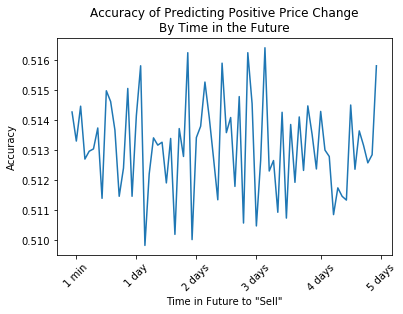

In [113]:
plt.plot(accuracies)
plt.title('Accuracy of Predicting Positive Price Change\nBy Time in the Future')
plt.xlabel('Time in Future to "Sell"')
plt.ylabel('Accuracy')
plt.xticks([1,15,29,43,58,72],['1 min','1 day','2 days','3 days','4 days','5 days'],
           rotation = 45)

Here we can see that there is no real good time in the future that a single minute's twitter data can predict.  The accuracy hovers between 51% and 52% accuracy, not really much better than flipping a coin, which is awful for binary data.  

Some future improvements that I will be implementing will be to aggregate the number of tweets until the future time to be selling.  The current method to use just the current minute to predict some time period in the future seems very unstable, and is showing to be.  Thus, we can see a trend of many tweets in a given time period to see whether or not it is associated with the price changes in bitcoin.

Another improvement to be made is the sentiment analysis.  Currently I only have the average sentiment over that minute, but the minimum and maximum and standard deviation could be of use to use.  This will take some time to get though since it will need more work on the server and recollection of all of the sentiment, thus, it will come in a later report.

## Implementing Lags

## More exploring with the binary logistic model

In [ ]:
## combine the number of tweets up to the desired time ahead
# accuracies = []
# for i in range(1,1440*5,100):
#     dummy_df = sentiment
#     dummy_df['price_change_future'] = dummy_df['price'].shift(-1) - dummy_df['price']
#     x_vars = ['count','favorites','retweets','avg_sentiment',
#           'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#     dummy_df = dummy_df.sample(frac = 1)
#     n = int(0.75 * len(dummy_df))
#     train = dummy_df[:n]
#     test = dummy_df[n:]
#     x_train = train[x_vars]
#     x_test = test[x_vars]
#     y_train = train['price_change_future'] > 0
#     y_test = test['price_change_future'] > 0
#     lm.fit(x_train,y_train)
#     accuracies.append(lm.score(x_test,y_test))

In [26]:
## using cross validation to make use of all of our data (with not much risk to time)

from sklearn import linear_model
lm = linear_model.LogisticRegressionCV()

dummy_df = sentiment
dummy_df['price_change_future'] = (dummy_df['price'].shift(-3600) - dummy_df['price']).fillna(method = 'ffill')
dummy_df['sum_count'] = sentiment['count'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')
dummy_df['sum_favorites'] = sentiment['favorites'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')
dummy_df['sum_retweets'] = sentiment['retweets'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')
dummy_df['sum_avg_sentiment'] = sentiment['avg_sentiment'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')

x_vars = ['count','favorites','retweets','avg_sentiment',
          'sum_count','sum_favorites','sum_retweets','sum_avg_sentiment',
          'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

dummy_df = dummy_df.sample(frac = 1)
lm.fit(dummy_df[x_vars],dummy_df['price_change_future'] > 0)

# accuracies.append(lm.score(x_test,y_test))

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [36]:
dummy_df['price_change_future'] = (dummy_df['price'].shift(-3600) - dummy_df['price']).fillna(method = 'ffill')

In [27]:
lm.score(dummy_df[x_vars],dummy_df['price_change_future'] > 0)

0.65191327829193912

In [28]:
np.mean(dummy_df['price_change_future'] > 0)

0.64985286203937576

In [29]:
np.mean(lm.predict(dummy_df[x_vars]))

0.9855770862320562

(array([   1621.,    2311.,   12523.,   42113.,  226623.,  103326.,
          17259.,    1801.,    1362.,    3599.]),
 array([ 0.35904325,  0.42236085,  0.48567845,  0.54899605,  0.61231365,
         0.67563125,  0.73894885,  0.80226645,  0.86558405,  0.92890165,
         0.99221925]),
 <a list of 10 Patch objects>)

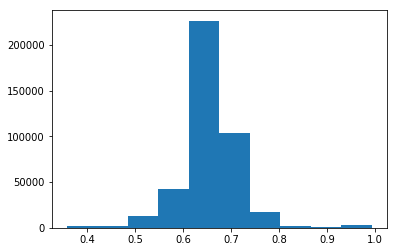

In [30]:
plt.hist(lm.predict_proba(dummy_df[x_vars])[:,1])

In [17]:
## confusion matrix for the price increase predictions
from sklearn.metrics import confusion_matrix
y_true = dummy_df['price_change_future'] > 0
y_pred = lm.predict(dummy_df[x_vars])

confusion_matrix(y_true,y_pred)

array([[  3395, 141054],
       [  2545, 265544]], dtype=int64)

In [53]:
## test the amount of money made for the different levels of riskiness for trading




## Exploration with a different machine learning model

### LassoCV regression (not sure if this is using the binary nature though)

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV()
dummy_df = dummy_df.sample(frac = 1)
lasso.fit(dummy_df[x_vars],dummy_df['price_change_future'] > 0)

In [57]:
lasso.score(dummy_df[x_vars],dummy_df['price_change_future'] > 0)

0.65202478317148971

In [60]:
lasso.coef_

array([[  5.75885890e-07,   5.94585475e-06,   3.26306153e-05,
          5.16918804e-07,  -7.11816996e-06,  -1.30345483e-05,
          1.83017086e-05,   2.41880903e-03,   2.16857877e-07,
         -1.05585520e-06,   1.45830790e-06,   3.41616715e-06,
          2.63987073e-09,  -7.63078062e-06,   2.09365979e-06,
          2.16857877e-07]])

(array([   1918.,    2206.,   12910.,   55151.,  235918.,   83824.,
          14173.,    1596.,    1242.,    3600.]),
 array([ 0.36389295,  0.42750263,  0.4911123 ,  0.55472198,  0.61833166,
         0.68194133,  0.74555101,  0.80916069,  0.87277036,  0.93638004,
         0.99998972]),
 <a list of 10 Patch objects>)

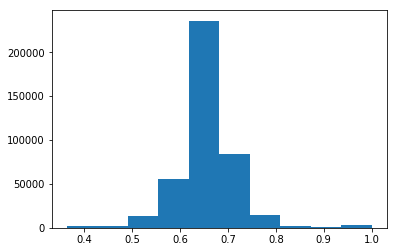

In [59]:
plt.hist(lasso.predict_proba(dummy_df[x_vars])[:,1])

### For the next mdoels, we need a training and testing set

In [79]:
t = 3600

dummy_df = sentiment
dummy_df['price_change_future'] = (dummy_df['price'].shift(-t) - dummy_df['price']).fillna(method = 'ffill')
dummy_df['sum_count'] = sentiment['count'].rolling(t-1).sum().shift(2-t).fillna(method = 'ffill')
dummy_df['sum_favorites'] = sentiment['favorites'].rolling(t-1).sum().shift(2-t).fillna(method = 'ffill')
dummy_df['sum_retweets'] = sentiment['retweets'].rolling(t-1).sum().shift(2-t).fillna(method = 'ffill')
dummy_df['sum_avg_sentiment'] = sentiment['avg_sentiment'].rolling(t-1).sum().shift(2-t).fillna(method = 'ffill')

x_vars = ['count','favorites','retweets','avg_sentiment',
          'sum_count','sum_favorites','sum_retweets','sum_avg_sentiment',
          'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

dummy_df = dummy_df.sample(frac = 1)
n = int(0.75 * len(dummy_df))
train = dummy_df[:n]
test = dummy_df[n:]
x_train = train[x_vars]
x_test = test[x_vars]
y_train = train['price_change_future'] > 0
y_test = test['price_change_future'] > 0

### k-nearest neighbors
This takes a really long time

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1000)
dummy_df = dummy_df.sample(frac = 1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1000, p=2,
           weights='uniform')

In [ ]:
knn.score(dummy_df[x_vars],dummy_df['price_change_future'] > 0)

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

## Now Trying to Predict the Actual Price Change

In [68]:
dummy_df = sentiment
dummy_df['price_change_future'] = (dummy_df['price'].shift(-3600) - dummy_df['price']).fillna(method = 'ffill')
dummy_df['sum_count'] = sentiment['count'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')
dummy_df['sum_favorites'] = sentiment['favorites'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')
dummy_df['sum_retweets'] = sentiment['retweets'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')
dummy_df['sum_avg_sentiment'] = sentiment['avg_sentiment'].rolling(3599).sum().shift(-3598).fillna(method = 'ffill')

x_vars = ['count','favorites','retweets','avg_sentiment',
          'sum_count','sum_favorites','sum_retweets','sum_avg_sentiment',
          'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

dummy_df = dummy_df.sample(frac = 1)
n = int(0.75 * len(dummy_df))
train = dummy_df[:n]
test = dummy_df[n:]
x_train = train[x_vars]
x_test = test[x_vars]
y_train = train['price_change_future']
y_test = test['price_change_future']

from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
lm.score(x_test,y_test)

0.11034966643408595

In [73]:
y_pred = lm.predict(x_test)
y_true = y_test

Text(0.5,0,'Predicted Price Change')

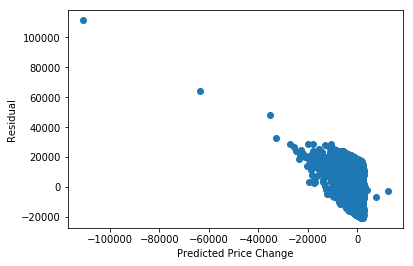

In [74]:
## residual analysis
plt.plot(y_pred,np.sort(y_true) - y_pred,'o')
plt.ylabel('Residual')
plt.xlabel('Predicted Price Change')

## shows non-linearity 
## maybe equal variance?

In [53]:
## shapiro-wilks test
from scipy.stats import shapiro
shapiro(y_pred - np.sort(y_true))

C:\Users\Hans\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9479784965515137, 0.0)

##  Building a Model for Trading